# Cable sous-marin - Projet numérique Probabilités V
Par Nathan Bertho et Hadrien Goux

### Questions théoriques

**Question 1 :** Il s'agit de la loi forte des grands nombres.

**Question 2 :** 

On note $\mathbf{Z_{p}}=(Z(x_{j_{0}}),\dots,Z(x_{j_{N}}))$

Notons $m_{\textbf{Z}}$ le vecteur d'espérance de $\mathbf{Z}$ qui a pour chaque composante la valeur $\mu$ répétée $N+1$ fois, et $m_{\mathbf{Z_{p}}}$ l'espérence de $\mathbf{Z_{p}}$.

On complète le vecteur aléatoire $\textbf{Z}$ avec les composantes du vecteur aléatoire $\mathbf{Z_{p}}$, et on note ce vecteur aléatoire gaussien $\mathbf{Z_{tot}}$. 

Notons C la matrice de covariance de $\mathbf{Z_{tot}}$. Alors :

\begin{equation*} C = \left(\begin{array}{cc} C_Z & C_{Z,Z_{p}} \\ C_{Z_{p},Z} & C_{Z_{p}} \end{array}\right) \end{equation*}

Où $C_Z \; et \;  C_{Z,Z_{p}}$ sont respectivement les matrices de covariances de $\textbf{Z}$ et $\mathbf{Z_{p}}$, $C_{Z,Z_{p}} = Cov(\textbf{Z},\mathbf{Z_{p}})$ et $C_{Z_{p},Z} = Cov(\mathbf{Z_{p}},\textbf{Z})$.

Alors, d'après le cours, la variable aléatoire $Z|Z_{p}=z$ suit une loi gaussienne d'espérance $m_{Z|Z_{p}=z} = m_{\textbf{Z}} + C_{Z,Z_{p}}C_{Z_{p}}^{-1}(z-m_{\mathbf{Z_{p}}})$ et de matrice de covariance $C_{Z|Z_{p}=z} = C_Z-C_{Z,Z_{p}}C_{Z_{p}}^{-1}C_{Z_{p},Z}$/

**Question 3 :**
Y est un vecteur de composantes gaussiennes indépendantes, dont chacune des composantes est centrée (i.e d'espérance nulle) et réduite (i.e de variance 1), alors le vecteur Z = m + RX est un vecteur gaussien comme combinaison linéaire de variable aléatoires gaussienne d'espérance m et de variance $ C=R R^t$ (matrice de covariance) d'après le cours.

**Question 4 :**
En prenant Y un vecteur gaussien, centré, réduit, on cherche à le transformer en Z un vecteur de loi conditionnelle qui correspond aux points de discrétisation sans observation, qui connaît les dernières valeurs prises (celles de $\mathbf{Z_{p}}$). En utilisant la question 2, on peut construire l'espérance $m_{Z | \mathbf{Z_{p}}=z}$ de ce vecteur gaussien et sa matrice de covariance $C_{Z|Z_{p}=z}$.

D'après la question 3, on doit construire une matrice $R$ telle que $C = RR^t$ pour que $Z$ (construit comme $Z=m+RY$) ait pour variance la matrice de covariance $C$ . On construit $R$ par décomposition par factorisation de Cholesky de C. Il suffit donc de simuler un vecteur gaussien, centré, réduit à l'aide de la méthode de Box-Muller, puis de se ramener à $Z=m+RY$

### Questions pratiques

**Définition des données et du code**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mu=-5
a = 50
sigma2 = 12

A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
disc_ind = np.arange(N)
disc = disc_ind*Delta

obs_ind = [0,20,40,60,80,100]
prof = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

inc_ind=list(set(disc_ind)-set(obs_ind))

**Question 1**

On écrit une fonction qui prend en argument la distance entre les points dist, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.

In [3]:
def Cov(dist, a, sigma_2) :
    return sigma_2 * np.exp(-np.abs(dist)/a)

**Question 2**

La matrice des distances se calcule comme suit :

In [4]:
def mat_distance() :
    MD = np.zeros((N, N))
    for i in range(N) :
        for j in range(i) :
            MDij = (B-A)/(N-1) * (i-j)
            MD[i,j] = MDij
            MD[j,i] = MDij
    return MD

print(mat_distance())

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


**Question 3**

En appliquant directement la fonction précédente, on obtient la matrice de covariance de Z :

In [5]:
CZ = Cov(mat_distance(), a, sigma2)
print(CZ)

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


**Question 4**

On extrait les matrices de covariance demandées :

 * entre les observations, nommée Cov_obs

 * entre les inconnues, Cov_inc
 
 * entre les observations et les inconnues, Cov_all


In [6]:
Cov_obs = np.array([[ CZ[i][j] for j in obs_ind] for i in obs_ind])
Cov_inc = np.array([[ CZ[i][j] for j in inc_ind] for i in inc_ind])
Cov_all = np.array([[ CZ[i][j] for i in obs_ind] for j in inc_ind])

**Question 5** 

Dans le cas où on cherche l'espérance conditionnelle des composantes non observées connaissant les observations, si on note Y le vecteur des composantes non observées et Z celui des composantes observées, l'espérance conditionnelle de Y sachant Z est la variable aléatoire $m_Y - C_{Y,Z}C_Z^{-1}(Z-m_Z)$ avec $C_{Y,Z} = Cov(Y,Z)$, $C_Z = Cov(Z,Z)$ et $m_Y = \mathbb{E}(Y)$.
En reprenant les notations précédentes, $C_Z = cov\_obs$, $m_Y = m_Z = \mu$.

Ce qui donne l'espérance conditionnelle :

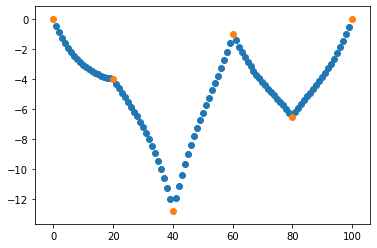

In [7]:
Inv_cov_obs = np.linalg.inv(Cov_obs)
m_zp = [-5 for i in range (len(obs_ind))]
m_z = [-5 for i in range (len(inc_ind))]

esp_cond = m_z + np.dot(np.matmul(Cov_all,(Inv_cov_obs)),(prof - m_zp))

plt.scatter(inc_ind, esp_cond)
plt.scatter(obs_ind, prof)

**Question 6** 

La matrice de covariance de la variable aléatoire $Y|Z$ est $C_Y - C_{Y,Z}C_Z^{-1}C_{Z,Y}$

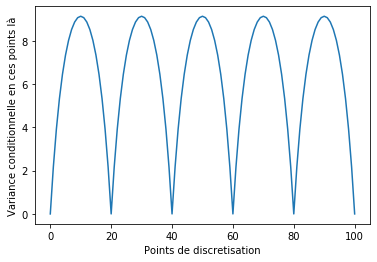

In [8]:
CY_z = Cov_inc - np.matmul(np.matmul(Cov_all,(Inv_cov_obs)),(Cov_all.T))
diag = [CY_z[i][i] for i in range(95)]

# Pour rajouter la variance conditionnelle (nulle) des points connus :
var_cond = [(0 if i%20 == 0 else diag[i - (i//20 + 1)]) for i in range (101)]
ind = [i for i in range (101)]

plt.plot(ind, var_cond)
plt.xlabel('Points de discretisation')
plt.ylabel('Variance conditionnelle en ces points là')
plt.show()

On peut observer qu'à tous les points connus (0, 20, 40, 60, 80, 100), la variance est nulle (ce qui est logique vu qu'on connaît les points).

En revanche, plus on s'éloigne de ces points de connaissance, et moins précis le résultat est, d'où une augmentation de la variance entre deux points connus.

**Question 7**

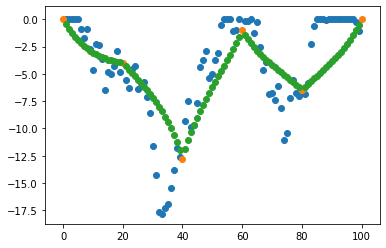

In [9]:
R = np.linalg.cholesky(CY_z)
def simulation() :
    Y = np.zeros(95)
    Y_2 = np.zeros(95)
    for i in range(95) :
        U = np.random.uniform()
        V = np.random.uniform()
        Y[i] = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V) #vecteur gaussien centré, réduit construit selon la méthode de Box-Muller
        Y_2[i] = np.random.randn(1)
    Z = esp_cond + R.dot(Y_2)
    
    
    for k in range(len(Z)) :
        if Z[k]>0:
            Z[k]=0
        
    return Z

Z = simulation()
plt.scatter(inc_ind, Z)
plt.scatter(obs_ind, prof)
plt.scatter(inc_ind, esp_cond)

**Question 8**

On écrit une fonction qui renvoie la longueur du câble L en fonction du vecteur des profondeurs prof et du pas de discrétisation dx : 

In [17]:
def longueur(prof, dx) :
    L = 0
    N = len(prof)
    
    for i in range(1,N) :
        L += np.sqrt(dx**2 + (prof[i] - prof[i-1])**2)
    return L

**Question 9**

Ce qui donne la longueur estimée, pour 100 simulations :

In [18]:
def complet(Z) : 
    return [(prof[i//20] if i%20 == 0 else Z[i - (i//20 + 1)]) for i in range (101)]

def long_simul(NB) :
    L = []
    V=[]
    for k in range(NB) :
        Z = simulation()
        L.append(longueur(complet(Z), Delta))
        V.append((longueur(complet(Z), Delta))**2) 
    return L, V

L100, V100 = long_simul(100)


print(f"Espérance conditionnelle de la longueur estimée par le code, c'est à dire longueur estimée : {np.round(np.average(L100), 3)}m.")
print(f"Variance conditionnelle de la longueur estimée par le code : {np.round(np.average(V100)-np.average(L100)**2,3)}m.")

Espérance conditionnelle de la longueur estimée par le code, c'est à dire longueur estimée : 520.098m.
Variance conditionnelle de la longueur estimée par le code : 8.154m.


**Question 10** On a si on note $L_i$ la longueur de la ième simulation, $M_n = \frac{\sum_{i=1}^n L_i}{n}$ donc on trouve de manière triviale la relation de récurrence $M_{n+1} = \frac{\sum_{i=1}^{n+1} L_i}{n+1} = \frac{nM_n + L_{i+1}}{n+1}$ avec comme initialisation $M_1 = L_1$

On peut supposer que l'espérance de la longueur simulée 100 fois tend vers une valeur proche de M_100 = 519.916


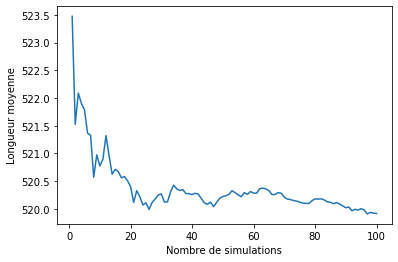

In [12]:
L100 = long_simul(100)[0]

def affich_Mn(L, ax = None) :
    NB = len(L)
    les_x = [k for k in range(1, NB+1)]
    les_y = [np.average(L[:i]) for i in range(1, NB+1)]
    if ax == None :
        ax = plt.gca()
    ax.set_xlabel("Nombre de simulations")
    ax.set_ylabel("Longueur moyenne")
    ax.plot(les_x, les_y)
    print(f"On peut supposer que l'espérance de la longueur simulée {NB} fois tend vers une valeur proche de M_{NB} = {np.round(les_y[-1], 3)}")
    
affich_Mn(L100)

**Question 11**

Pour obtenir l'histogramme des longueurs de câble générées :

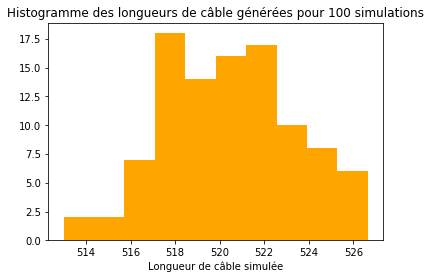

In [13]:
L100 = long_simul(100)

def graph(L, ax = None) :
    NB = len(L)
    n_bins = min(int(np.sqrt(NB)), 100)
    if ax == None :
        ax = plt.gca()
    n, bins, patches = ax.hist(L, n_bins, facecolor='orange')
    ax.set_xlabel("Longueur de câble simulée")
    ax.set_title(f"Histogramme des longueurs de câble générées pour {NB} simulations")

graph(L100[0])

**Question 12**

L'intervalle de confiance à 95% est défini tel qu'une longueur simulée a 95% de chances de s'y trouver.
On calcule la longueur simulée en réitérant une expérience et en en moyennant le résultat. Ainsi, d'après le théorème de centrale limite, cette moyenne suit une loi normale de variance pour le moment inconnue.

Pour l'obtenir, on estime l'écart type de notre échantillon, en calculant l'écart type sur chaque longueur de notre liste par rapport à la longueur moyenne de la liste. Pour tenir compte du fait que la variance est une estimation, la largeur de l'intervalle de confiance est calculée par la distribution de la variable t de Student 

Si on veut un intervalle de confiance bilatéral à 95%, on prend le coef de student de 97,5%. Il vaut 1,984 pour 100 degrés de liberté et converge vers 1,960 pour de plus grand degré de liberté. 

In [19]:
def estimation_esperance_student(L) : 
    moyenne, ecart_type = 0, 0
    t=0
    N=len(L)
    if N > 150 : 
        t=1.984
    else : 
        t = 1.960
    for l in L :
        moyenne+=l/N      
    for l in L : 
        ecart_type += (l-moyenne)**2
    ecart_type = np.sqrt(ecart_type/N)   
    print(f"L'espérance de la longueur a 95% de chances de se situer dans l'intervalle [{moyenne-t*ecart_type/np.sqrt(N)},{moyenne+t*ecart_type/np.sqrt(N)}]) \n")    

estimation_esperance_student(L100)

L'espérance de la longueur a 95% de chances de se situer dans l'intervalle [519.5382135943798,520.6575867800002]) 



De là, deux méthodes s'offrent à nous :
- la première méthode calcule un intervalle de confiance sur la valeur moyenne de l'échantillon, donc un intervalle de confiance sur l'espérance de la longueur. Elle repose sur le fait qu'on approxime l'espérance à une loi normale.
- la seconde méthode calcule, et ce de manière beaucoup plus simpliste, un intervalle dans lequel 95% des longueurs simulées devraient se trouver environ. Pour cela elle releve simplement les valeurs limites telles que l'intervalle proposée contienne 95% des valeurs de longueurs simulées.

In [20]:
def intconf_95(L):
    N = len(L)
    moyenne = 0
    ecart_type = 0  
    for l in L :
        moyenne+=l/N        
    for l in L : 
        ecart_type += (l-moyenne)**2
    ecart_type = np.sqrt(ecart_type/N)
    
    print(f"En réalisant {N} simulations et en approximant à une loi normale, on estime qu'une longueur simulée a 95% de chances de se situer dans l'intervalle [{moyenne - 1.96*ecart_type}, {moyenne + 1.96*ecart_type}]")

intconf_95(L100)

En réalisant 100 simulations et en approximant à une loi normale, on estime qu'une longueur simulée a 95% de chances de se situer dans l'intervalle [514.5010342590879, 525.6947661152922]


In [21]:
def intconf_95_empirique(L):
    N=len(L)
    moyenne = np.average(L)
    ecart_moyen = [np.abs(moyenne - i) for i in L]
    ecart_moyen.sort()
    demi_largeur_int = ecart_moyen[int(np.ceil(N*0.95))]
    print(f"De manière plus simpliste on obtient [{moyenne-demi_largeur_int}, {moyenne+demi_largeur_int}] \n")
                   
intconf_95_empirique(L100)

De manière plus simpliste on obtient [514.809968629031, 525.385831745349] 



**Question 13**

La probabilité que la longueur du câble dépasse 525m s'approxime en comptant le nombre de simulations de longueur qui dépasse 525 mètres et en le divisant par le nombre total de longueurs simulées de l'échantillon :

In [22]:
def sup_525(L) :
    n = 0
    for i in L:
        if i > 525 :
            n += 1
    return n/len(L)
    
print(f"La probabilité que la longueur du câble excède 525m est d'environ {sup_525(L100)}")

La probabilité que la longueur du câble excède 525m est d'environ 0.07


**Question 14**

100 000 simulations ne sont pas supportées par le noyau, on se limite aux cas 1000 et 10000.

In [23]:
Le3 = long_simul(1000)
Le4 = long_simul(10000)
L = [Le3, Le4]

On peut supposer que l'espérance de la longueur simulée 1000 fois tend vers une valeur proche de M_1000 = 520.274
On peut supposer que l'espérance de la longueur simulée 10000 fois tend vers une valeur proche de M_10000 = 520.267


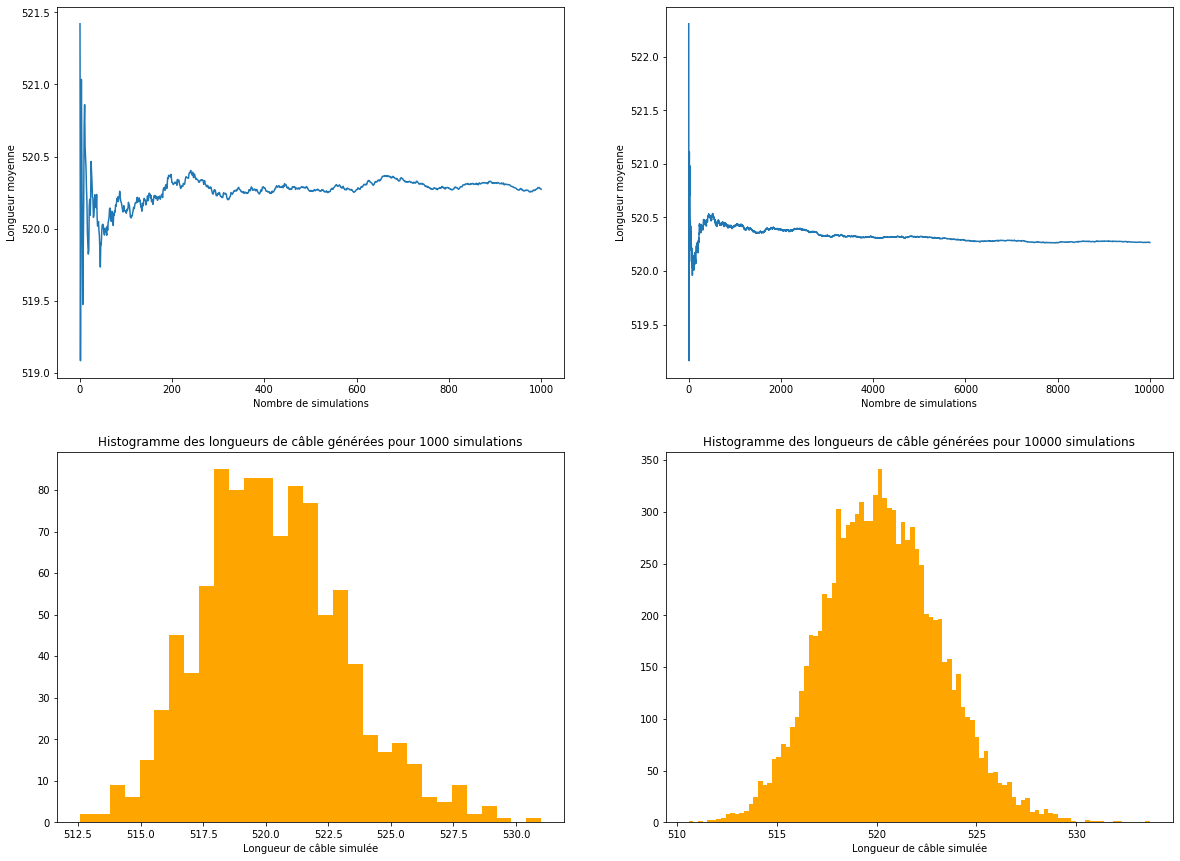

In [24]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
for i in range(2) :
    affich_Mn(L[i][0], axes[0, i])
    graph(L[i][0], axes[1, i])

*Cas 1000 simulations*

In [25]:
estimation_esperance_student(L[0][0])
intconf_95_empirique(L[0][0])
print(f"La probabilité que la longueur du câble excède 525m est d'environ {sup_525(L[0][0])}")

L'espérance de la longueur a 95% de chances de se situer dans l'intervalle [520.0954849518283,520.4528699989959]) 

De manière plus simpliste on obtient [514.6503974982776, 525.8979574525459] 

La probabilité que la longueur du câble excède 525m est d'environ 0.062


*Cas 10 000 simulations*

In [26]:
estimation_esperance_student(L[1][0])
intconf_95_empirique(L[1][0])
print(f"La probabilité que la longueur du câble excède 525m est d'environ {sup_525(L[1][0])}")

L'espérance de la longueur a 95% de chances de se situer dans l'intervalle [520.2093163759989,520.3242917376069]) 

De manière plus simpliste on obtient [514.6089460590908, 525.924662054515] 

La probabilité que la longueur du câble excède 525m est d'environ 0.0552
